Saving babies.csv to babies (7).csv
First 5 rows of the dataset:
   case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77

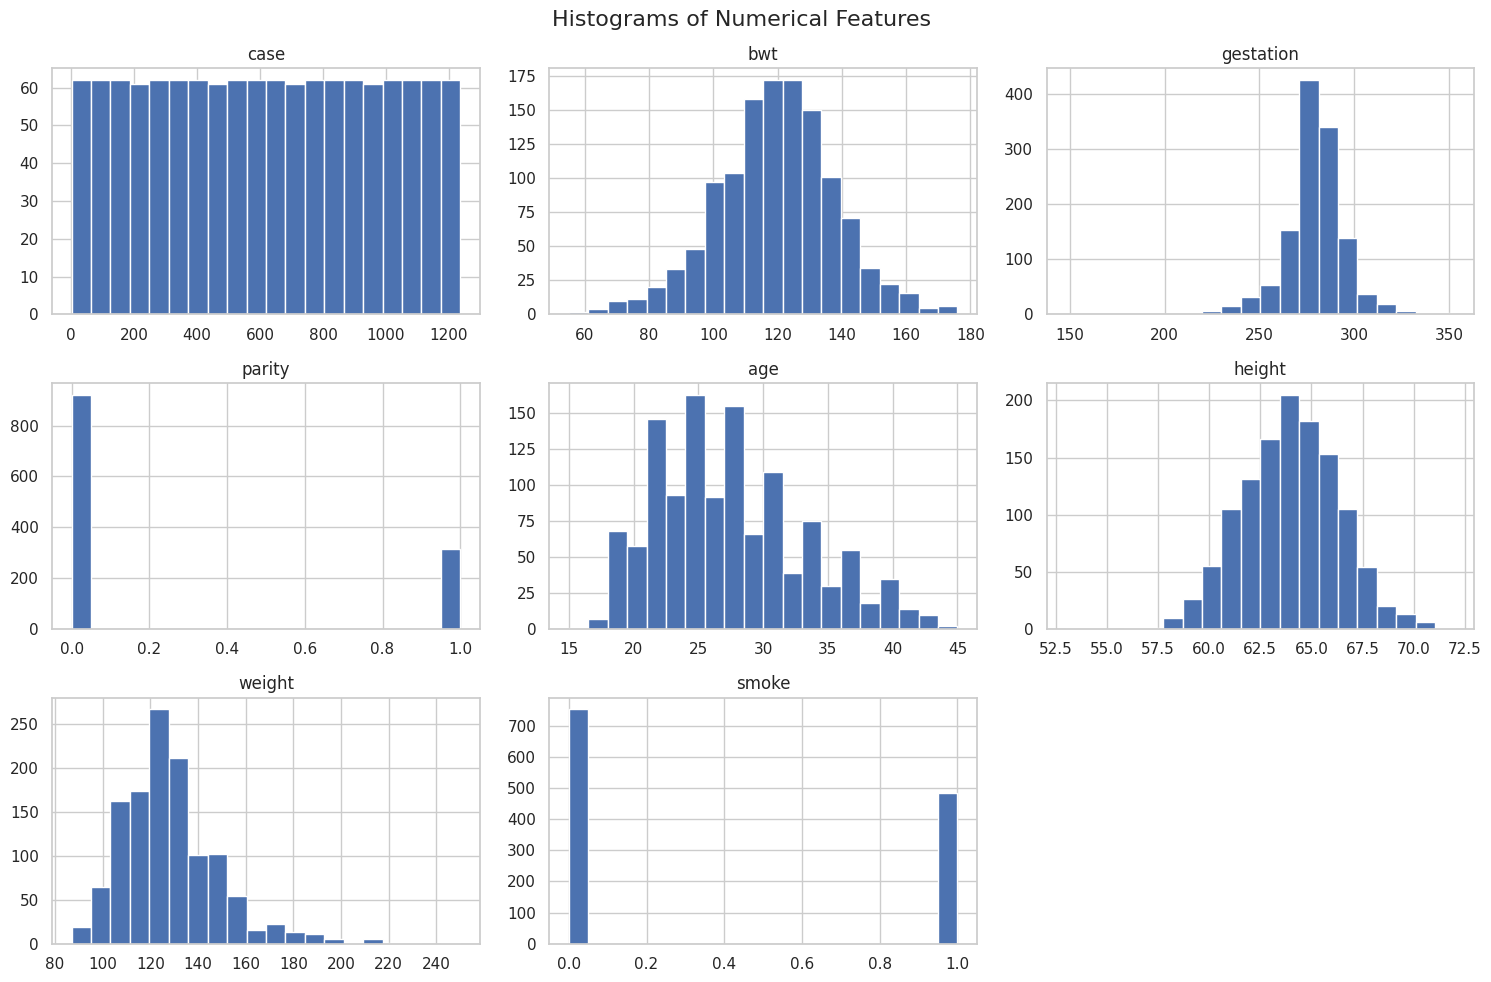

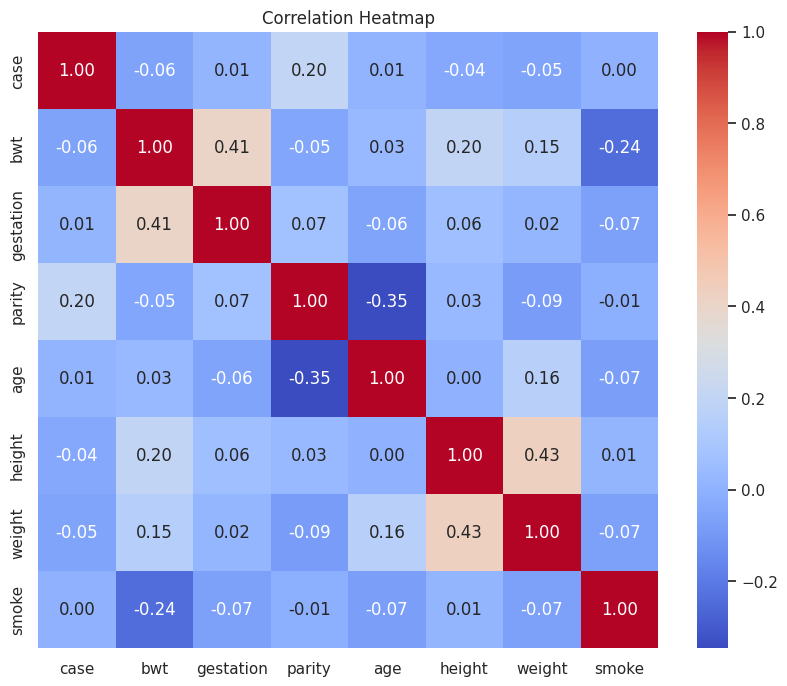

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file
df = pd.read_csv("babies.csv")

# Step 3: Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Summary of the dataset
print("\nDataset Summary:")
print(df.info())

# Step 5: Handle missing data
# Show columns with missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing numeric values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 6: Check for inconsistent data
# Example: Remove rows with negative values in columns that should be positive
# Customize this based on the actual context of the data
if 'wt' in df.columns:
    df = df[df['wt'] >= 0]

# Step 7: Visualize the cleaned dataset
# Histogram for numerical data
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
